<a href="https://colab.research.google.com/github/SusanaSernaJaramillo/Business-Intellingene/blob/main/Primer_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

De acuerdo con la base de datos NDA_Data del Capitulo 13 del Libro Guía (Analítica de Negocios – Comunicación con Datos - Jaggia), implementar tres modelos que permitan determinar si el número de juegos jugados por jugador de la NBA esta por encima del promedio (games_played). Para la implementación de los modelos, se deben tener en cuenta las siguientes recomendaciones:
•	Las variables de entrada para la construcción del modelo son las siguientes: Salary, Age, Height, Weight, games_started, minutes_per_game, assits, blocks, steals.

•	Para aplicar la línea de código XDB.dropna(), es necesario primero seleccionar las variables de entrada y de salida.

•	Determinar cual de los modelos tuvo un mejor comportamiento frente al pronóstico de la variable games_played (por encima (1) – por debajo (0) del promedio de la variable. )

•	Para la construcción del árbol, es necesario considerar solo 4 niveles, mientras que para el modelo de Clusterización, es importante tener en cuenta 5 grupos de datos.

•	Para la obtención de la gráfica de los clusters, es importante tener en cuenta las variables que tienen una mayor correlación con respecto a la variable de salida, para luego mostrar las gráficas de correlación.

•	Determinar la categoría a la que pertenece una persona con las siguientes características mediante la utilización del modelo Naive Bayes y Clustering:
[5000000,37,82,245,45,17.8,0.5,1.4,0.4]

•	De acuerdo con la estructura del árbol de decisión, determinar la regla que cumple el deportista y cual es la probabilidad de pertenencia.



#**Se cargan los datos**

In [ ]:
#Liberias cientificas
import pandas as pd
import numpy as np

#Librerias del arbol
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

#Se procede con la implementación del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nxl='/content/drive/MyDrive/Analítica de negocios Notebooks/Analitica Base de datos/4. BD2_NBA_Data_M_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)


Para el análisis y desarrollo de los modelos, se utilizarán 10 variables de entrada descritas de la siguiente manera:

Salary: Salario del jugador en dólares.

Age: Edad del jugador en años.

Height: Altura del jugador en pulgadas.

Weight: Peso del jugador en libras.

games_started: Número de partidos en los que el jugador comenzó como titular.

minutes_per_game: Promedio de minutos jugados por partido.

assists: Total de asistencias realizadas por el jugador en la temporada.

blocks: Total de bloqueos defensivos realizados por el jugador.

steals: Total de robos de balón realizados por el jugador.

Además, se trabajará con una variable de salida que será el objetivo a evaluar con los modelos:

games_played_bin: Variable categórica que indica si el número de juegos jugados por el jugador (games_played) está por encima (1) o por debajo (0) del promedio.

In [ ]:
XDB.head()

,player_number,salary,age,height,weight,games_played,games_started,minutes_per_game,FG_made,FG_attempted,...,FT_attempted,FT_percent,offensive_rebounds,defensive_rebounds,assists,blocks,steals,personal_fouls,turnovers,points
0,1,947276,36,79,260,966,838,32.4,4.8,11.6,...,3.7,0.716,1.2,3.4,2.7,0.5,1.8,2.7,1.8,13.5
1,2,25000000,37,78,212,1346,1198,36.1,8.7,19.5,...,7.4,0.837,1.1,4.1,4.7,0.5,1.4,2.5,3.0,25.0
2,3,4088019,39,78,220,1274,954,32.4,6.8,15.5,...,4.6,0.800,1.2,3.4,3.4,0.6,1.1,2.8,1.9,18.8
3,4,5675000,36,77,195,1100,432,30.9,5.4,13.1,...,3.5,0.861,0.4,2.0,3.6,0.2,1.0,1.6,2.0,15.5
4,5,5250000,40,83,250,1392,1389,34.0,7.4,14.6,...,6.1,0.696,2.8,8.1,3.0,2.2,0.7,2.4,2.4,19.0


**Preparación de los datos**

In [ ]:
print(XDB.columns)

Index(['player_number', 'salary', 'age', 'height', 'weight', 'games_played',
       'games_started', 'minutes_per_game', 'FG_made', 'FG_attempted',
       'FG_percent', '3P_made', '3P_attempted', '3P_percent', 'FT_made',
       'FT_attempted', 'FT_percent', 'offensive_rebounds',
       'defensive_rebounds', 'assists', 'blocks', 'steals', 'personal_fouls',
       'turnovers', 'points'],
      dtype='object')


In [ ]:
XD = XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]  # Variable entrada
yd = XDB[['games_played']]  # Variable salida

In [ ]:
# Convertir games_played en una variable binaria
threshold = XDB['games_played'].mean()
XDB['games_played_bin'] = (XDB['games_played'] > threshold).astype(int)

In [ ]:
#Contar los valores faltantes antes de eliminarlos
nas = XDB.isna().sum()
nas

,0
player_number,0
salary,0
age,0
height,0
weight,0
games_played,0
games_started,0
minutes_per_game,0
FG_made,0
FG_attempted,0


In [ ]:
# Eliminar registros con valores faltantes
XDB = XDB.dropna()

In [ ]:
len(np.where(yd==1)[0])/len(XD)

0.0044943820224719105

In [ ]:
# Número total de datos después de eliminar valores faltantes
print('Número total de datos después de limpieza:', len(XDB))

Número total de datos después de limpieza: 445


#**1. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Separar variables predictoras y objetivo
X = XD
y = XDB['games_played_bin']

mnb = GaussianNB()
mnb.fit(X, y)

# Obtener información del modelo
u = mnb.theta_  # Media
print('La media de las variables es: \n', u)
var = mnb.var_  # Varianza
print('La varianza de las variables es: \n', var)
sigma = np.sqrt(var)  # Desviación estándar
print('La desviación estándar de las variables es: \n', sigma)

# Determinar límites superiores e inferiores
LS = u + sigma
LI = u - sigma
print('El límite superior es: \n', LS)
print('El límite inferior es: \n', LI)

# Evaluación de un nuevo jugador
new_player = np.array([[5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4]])
class_pred = mnb.predict(new_player)[0]
print('La predicción para el nuevo jugador es: \n', class_pred)
if class_pred == 0:
    print('El jugador está por debajo del promedio')
else:
    print('El jugador está por encima del promedio')


La media de las variables es: 
 [[2.91582743e+06 2.41607843e+01 7.91647059e+01 2.19423529e+02
  6.52352941e+01 1.82878431e+01 1.46941176e+00 3.88627451e-01
  5.98431373e-01]
 [7.42986398e+06 3.04684211e+01 7.92684211e+01 2.24731579e+02
  4.09294737e+02 2.66994737e+01 2.51473684e+00 5.62105263e-01
  8.41578947e-01]]
La varianza de las variables es: 
 [[1.15798849e+13 2.73523678e+04 2.73566841e+04 2.80171672e+04
  3.39158480e+04 2.74045416e+04 2.73465659e+04 2.73449991e+04
  2.73449589e+04]
 [3.68265886e+13 2.73570701e+04 2.73564280e+04 2.80246595e+04
  1.10096418e+05 2.73810055e+04 2.73484892e+04 2.73450417e+04
  2.73449657e+04]]
La desviación estándar de las variables es: 
 [[3.40292300e+06 1.65385513e+02 1.65398561e+02 1.67383294e+02
  1.84162559e+02 1.65543171e+02 1.65367971e+02 1.65363234e+02
  1.65363112e+02]
 [6.06849146e+06 1.65399728e+02 1.65397787e+02 1.67405674e+02
  3.31807803e+02 1.65472069e+02 1.65373786e+02 1.65363363e+02
  1.65363133e+02]]
El límite superior es: 
 [[6.318

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Evaluación en todos los datos
y_pred_nb = mnb.predict(X)
cm = confusion_matrix(y, y_pred_nb)
print('La matriz de confusión es: \n', cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

# Métricas de desempeño
EX = (VP + VN) / (VP + VN + FP + FN)  # Exactitud
print('La exactitud del modelo es:\n', EX)
TE = (FN + FP) / (VP + VN + FP + FN)  # Tasa de error
print('La tasa de error del modelo es:\n', TE)
SE = VP / (VP + FN)  # Sensibilidad
print('La sensibilidad del modelo es:\n', SE)
SP = VN / (VN + FP)  # Especificidad
print('La especificidad del modelo es:\n', SP)
PR = VP / (VP + FP)  # Precisión
print('La precisión del modelo es:\n', PR)
PRNeng = VN / (VN + FN)  # Precisión negativa
print('La precisión negativa del modelo es:\n', PRNeng)


La matriz de confusión es: 
 [[236  19]
 [ 76 114]]
La exactitud del modelo es:
 0.7865168539325843
La tasa de error del modelo es:
 0.21348314606741572
La sensibilidad del modelo es:
 0.6
La especificidad del modelo es:
 0.9254901960784314
La precisión del modelo es:
 0.8571428571428571
La precisión negativa del modelo es:
 0.7564102564102564


#**Análisis de Resultados Naive Bayes:**

De acuerdo con la base de datos suministrada, se tomó como referencia para la clasificación de jugadores la cantidad de partidos jugados en relación con el promedio. Se utilizaron variables como salario, edad, altura, peso, juegos iniciados, minutos por juego, asistencias, bloqueos y robos para entrenar el modelo Naive Bayes.

La base de datos se dividió en dos categorías: jugadores con partidos jugados por debajo del promedio y jugadores con partidos jugados por encima del promedio. Se obtuvo un total de 236 clasificaciones correctas para jugadores por debajo del promedio y 114 clasificaciones correctas para jugadores por encima del promedio.

De manera general, el modelo alcanzó una exactitud del 78.65%, lo que indica un buen desempeño en la clasificación. La especificidad fue del 92.55%, lo que significa que el modelo identificó correctamente la mayoría de los jugadores con pocos partidos jugados. Sin embargo, la sensibilidad fue del 60%, lo que indica que el modelo tuvo más dificultades para clasificar correctamente a los jugadores con más partidos jugados.

El modelo también mostró una precisión del 85.71%, lo que significa que cuando predice que un jugador está por encima del promedio, en la mayoría de los casos acierta. Además, la precisión negativa fue del 75.64%, lo que indica que el modelo también tiene un desempeño aceptable al identificar jugadores por debajo del promedio.

Además, se evaluó un nuevo jugador con las siguientes características:

Salario: 5,000,000
Edad: 37 años
Altura: 82 pulgadas
Peso: 245 libras
Juegos iniciados: 45
Minutos por juego: 17.8
Asistencias: 0.5
Bloqueos: 1.4
Robos: 0.4
El modelo de Naive Bayes clasificó a este jugador como "Por debajo del promedio", lo que indica que, según su perfil, es menos probable que juegue una gran cantidad de partidos en comparación con el resto de la base de datos.

En conclusión, el modelo de Naive Bayes mostró un buen desempeño en la clasificación de jugadores, especialmente en la identificación de aquellos con menos partidos jugados.

#**2. Árboles de Decisión**

In [ ]:

clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf_tree.fit(X, y)

#Se procede con la grafica
from sklearn.tree import export_graphviz #Me exporta a PNG, JPEG
from pydotplus import graph_from_dot_data #Me crea la grafica

# Exportar gráfico del árbol
dot_data = export_graphviz(clf_tree, feature_names=XD.columns, class_names=['Below Avg', 'Above Avg'], filled=True)
graph = graph_from_dot_data(dot_data)
graph.write_png('2. ArbolDecisión.png')
num_nodos_puros = sum(clf_tree.tree_.impurity == 0)
print(f"Número de nodos puros en el árbol (Gini = 0.0): {num_nodos_puros}")

Número de nodos puros en el árbol (Gini = 0.0): 6


In [ ]:
# Evaluación de jugadores por debajo del promedio
below_avg_players = XDB[XDB['games_played_bin'] == 0].index.tolist()
XD0 = X.loc[below_avg_players].values  # Datos de jugadores con 'games_played_bin' == 0
y_pred_below = clf_tree.predict(XD0)  # Predicción para jugadores debajo del promedio

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Guardar evaluación en Excel
df = pd.DataFrame(np.column_stack((below_avg_players, XD0, y_pred_below)))
df.columns = ['Player Index', 'Salary', 'Age', 'Height', 'Weight', 'Games Started', 'Minutes per Game', 'Assists', 'Blocks', 'Steals', 'Prediction']
df.to_excel("Evaluación NBA.xlsx")

In [ ]:
ydp = clf_tree.predict(X)
cm = confusion_matrix(y, ydp)
print("Matriz de confusión:\n", cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
#Métricas de desempeño
EX=(VP+VN)/(VP+VN+FP+FN) #Exactitud
print('La exactitud del modelo es:\n',EX)

TE=(FN+FP)/(VP+VN+FP+FN) #Tasa de error:
print('La tasa de error del modelo es:\n',TE)

SE=VP/(VP+FN) #Sensibilidad
print('La sensibilidad del modelo es:\n',SE)

SP=VN/(VN+FP) #Especificidad
print('La especificidad del modelo es:\n',SP)

PR=VP/(VP+FP) #Precisión
print('La precisión del modelo es:\n',PR)

PRNeng=VN/(VN+FN) #Precisión Negativa
print('La precisión negativa del modelo es:\n',PRNeng)

Matriz de confusión:
 [[247   8]
 [ 12 178]]
La exactitud del modelo es:
 0.9550561797752809
La tasa de error del modelo es:
 0.0449438202247191
La sensibilidad del modelo es:
 0.9368421052631579
La especificidad del modelo es:
 0.9686274509803922
La precisión del modelo es:
 0.956989247311828
La precisión negativa del modelo es:
 0.9536679536679536


#**Análisis de resultados Arbol de decisión**

La matriz de confusión obtenida refleja un alto desempeño del modelo en la clasificación de jugadores según su cantidad de juegos disputados. Se observa una predominancia de clasificaciones correctas, con 247 verdaderos negativos (jugadores correctamente identificados como por debajo del promedio) y 178 verdaderos positivos (jugadores correctamente identificados como por encima del promedio).

El modelo alcanzó una exactitud del 95.5%, lo que indica que en la mayoría de los casos realiza predicciones correctas. La tasa de error se mantiene baja, en 4.4%, lo que confirma su fiabilidad.

En cuanto a la capacidad del modelo para identificar correctamente a los jugadores con más juegos disputados, la sensibilidad es del 93.6%, lo que significa que la mayoría de los jugadores con alto rendimiento fueron detectados correctamente. Por otro lado, la especificidad alcanza un 96.8%, lo que demuestra que el modelo es aún más preciso al identificar a los jugadores con menor cantidad de juegos disputados.

La precisión del modelo (95.7%) también indica que la mayoría de las veces que predice que un jugador tiene un alto número de partidos jugados, esta predicción es acertada. Asimismo, la precisión negativa (95.3%) confirma que las predicciones de jugadores con menos partidos disputados también son confiables.

En general, el modelo de árbol de decisión muestra un rendimiento sólido y equilibrado, con un ligero sesgo hacia la correcta clasificación de jugadores con menos juegos disputados. Esto sugiere que es una herramienta confiable para evaluar el rendimiento de los jugadores en función de sus características.

#**Regla que cumple el deportista según el árbol de decisión:**

1. **Edad > 26.5** → Sigue la rama derecha.  
2. **Games Started ≤ 84** → Sigue la rama izquierda.  
3. **Games Started > 38** → Sigue la rama derecha.  
4. **Assists ≤ 0.65** → Sigue la rama izquierda.  

---

### **Probabilidad de pertenencia a cada categoría:**  
**Below Avg (por debajo del promedio de juegos jugados):**  
$$
P(BelowAvg) = \frac{1}{1+5} = \frac{1}{6} = 16.7\%
$$  

**Above Avg (por encima del promedio de juegos jugados):**  
$$
P(AboveAvg) = \frac{5}{6} = 83.3\%
$$  

### **Clasificación final:**  
Según el árbol de decisión, el jugador es clasificado en la categoría **Above Avg (por encima del promedio de juegos jugados)** con una probabilidad del **83.3%**.


#**3.Clustering Kmeans**

In [ ]:
XD= XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played']]  # Variable entrada
display(XD)

,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,966
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1346
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1274
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1100
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1392
...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,70
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,24
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,5
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,68


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
XD= XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played_bin']]
display(XD)
sns.pairplot(XD, hue='games_played_bin', size= 9, vars=['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals'])


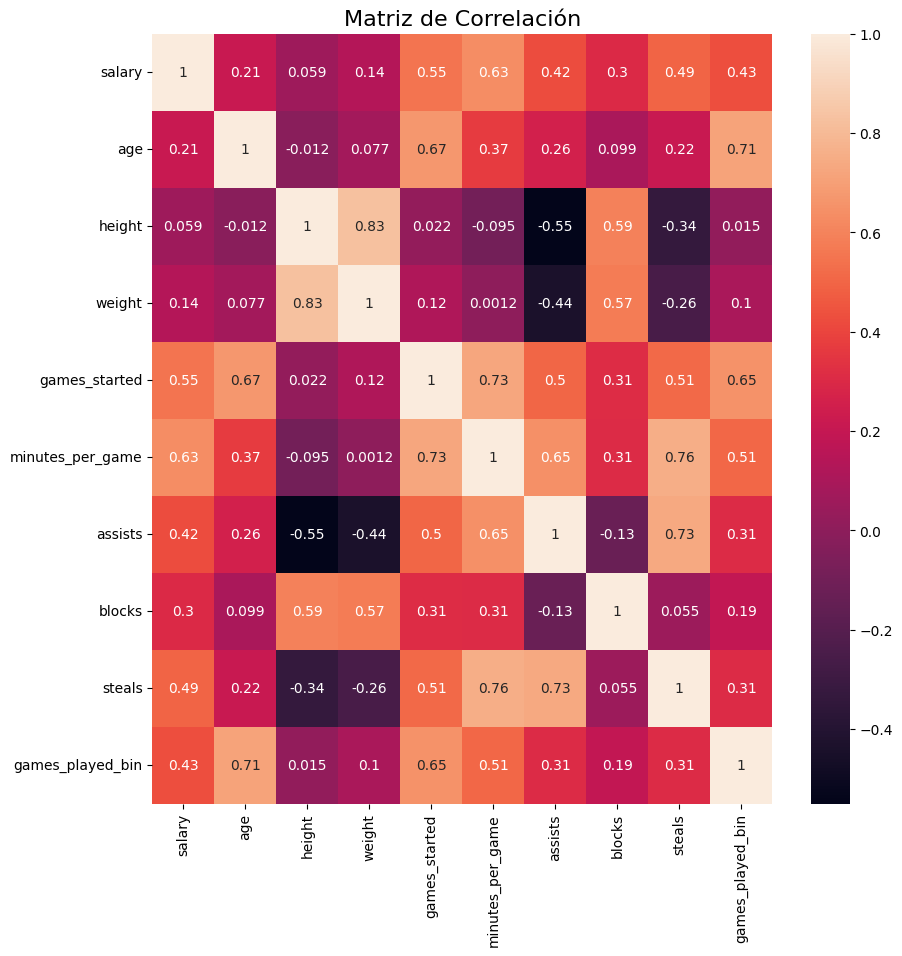

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(XD.corr(), annot=True)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

In [ ]:
# Se van a crear cinco subgrupos de datos ( Perfiles de crédito)
mkm= KMeans(n_clusters=nc,init='random',random_state=42)# Se van a crear cinco subgrupos de datos ( Perfiles de crédito)
nc = 5
mkm.fit(XD)
centroids = mkm.cluster_centers_
print('Los crentoides son:\n', centroids)

Los crentoides son:
 [[1.39398411e+07 2.73469388e+01 7.95510204e+01 2.27857143e+02
  3.96040816e+02 2.98061224e+01 3.04693878e+00 6.93877551e-01
  1.05306122e+00 6.73469388e-01]
 [3.97672950e+06 2.74684685e+01 7.95135135e+01 2.24126126e+02
  2.02702703e+02 2.34585586e+01 1.87027027e+00 4.92792793e-01
  7.04504505e-01 4.59459459e-01]
 [2.08213350e+07 3.00625000e+01 8.04375000e+01 2.38125000e+02
  6.88687500e+02 3.45312500e+01 3.71875000e+00 9.62500000e-01
  1.11875000e+00 1.00000000e+00]
 [8.03340889e+06 2.86964286e+01 7.86250000e+01 2.19392857e+02
  3.61410714e+02 2.70196429e+01 2.61071429e+00 4.85714286e-01
  8.67857143e-01 7.85714286e-01]
 [1.16304555e+06 2.56948357e+01 7.90328638e+01 2.18370892e+02
  9.97042254e+01 1.69309859e+01 1.36103286e+00 3.50234742e-01
  5.45539906e-01 2.15962441e-01]]


In [ ]:
labels=mkm.labels_
XDB['labels'] = labels
XDB

,player_number,salary,age,height,weight,games_played,games_started,minutes_per_game,FG_made,FG_attempted,...,offensive_rebounds,defensive_rebounds,assists,blocks,steals,personal_fouls,turnovers,points,games_played_bin,labels
0,1,947276,36,79,260,966,838,32.4,4.8,11.6,...,1.2,3.4,2.7,0.5,1.8,2.7,1.8,13.5,1,4
1,2,25000000,37,78,212,1346,1198,36.1,8.7,19.5,...,1.1,4.1,4.7,0.5,1.4,2.5,3.0,25.0,1,2
2,3,4088019,39,78,220,1274,954,32.4,6.8,15.5,...,1.2,3.4,3.4,0.6,1.1,2.8,1.9,18.8,1,1
3,4,5675000,36,77,195,1100,432,30.9,5.4,13.1,...,0.4,2.0,3.6,0.2,1.0,1.6,2.0,15.5,1,1
4,5,5250000,40,83,250,1392,1389,34.0,7.4,14.6,...,2.8,8.1,3.0,2.2,0.7,2.4,2.4,19.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,441,1733040,19,78,202,70,6,14.3,1.2,3.8,...,0.2,1.1,0.6,0.2,0.4,1.0,0.4,3.1,0,4
441,442,1140240,21,83,200,24,4,15.1,1.8,4.5,...,1.0,1.8,0.4,0.5,1.2,1.6,0.6,4.7,0,4
442,443,1131960,20,81,220,5,0,4.2,0.8,1.4,...,0.8,1.2,0.0,0.0,0.0,0.4,0.2,1.8,0,4
443,444,3102240,20,77,200,68,66,30.4,4.8,13.3,...,0.5,2.9,5.5,0.5,1.0,2.1,3.2,12.8,0,1


In [ ]:
# Tamaño de los clusters
ND = np.bincount(labels)
print('Tamaño de los Clusters:', ND)

Tamaño de los Clusters: [ 49 111  16  55 214]


In [ ]:
cluster_counts = XDB['labels'].value_counts().sort_index()
print(cluster_counts)

labels
0     49
1    111
2     16
3     55
4    214
Name: count, dtype: int64


In [ ]:
NAB = XDB.groupby('labels').agg({'games_played_bin': lambda x: (x == 1).sum()})
NBL = XDB.groupby('labels').agg({'games_played_bin': lambda x: (x == 0).sum()})
print("El número de jugadores por encima del promedio por cluster es:\n", NAB)
print("El número de jugadores por debajo del promedio por cluster es:\n", NBL)

El número de jugadores por encima del promedio por cluster es:
         games_played_bin
labels                  
0                     33
1                     52
2                     16
3                     43
4                     46
El número de jugadores por debajo del promedio por cluster es:
         games_played_bin
labels                  
0                     16
1                     59
2                      0
3                     12
4                    168


In [ ]:
# Conteo de jugadores Above Avg y Below Avg por cluster
AboveAvg_PerCluster = XDB.groupby('labels')['games_played_bin'].apply(lambda x: (x == 1).sum())
BelowAvg_PerCluster = XDB.groupby('labels')['games_played_bin'].apply(lambda x: (x == 0).sum())
# Calcular proporciones correctamente
AboveAvg_PerCluster = AboveAvg_PerCluster / ND
BelowAvg_PerCluster = BelowAvg_PerCluster / ND

# Mostrar resultados
print('Porcentaje de jugadores Por encima del promedio por Cluster:\n', AboveAvg_PerCluster)
print('Porcentaje de jugadores Por debajo del promedio por Cluster:\n', BelowAvg_PerCluster)

Porcentaje de jugadores Por encima del promedio por Cluster:
 labels
0    0.673469
1    0.468468
2    1.000000
3    0.781818
4    0.214953
Name: games_played_bin, dtype: float64
Porcentaje de jugadores Por debajo del promedio por Cluster:
 labels
0    0.326531
1    0.531532
2    0.000000
3    0.218182
4    0.785047
Name: games_played_bin, dtype: float64


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Inicializar ydp con ceros
ydp = np.zeros((len(XD), 1))

# Iterar sobre cada jugador en la base de datos
for K in range(len(XD)):
    napr = labels[K]  # Obtener el cluster al que pertenece el jugador

    print('La persona tal:', K)
    print('El cluster al que pertenece es:', napr)
    print('Probabilidad de estar por encima del promedio:', AboveAvg_PerCluster.values[napr])
    print('Probabilidad de estar por debajo del promedio:', BelowAvg_PerCluster.values[napr])

    # Asignar valor a ydp basado en las probabilidades
    if AboveAvg_PerCluster.values[napr] > BelowAvg_PerCluster.values[napr]:
        ydp[K] = 1  # Asignar 1 si la probabilidad de Above Avg es mayor
    else:
        ydp[K] = 0  # Asignar 0 si la probabilidad de Below Avg es mayor



La persona tal: 0
El cluster al que pertenece es: 4
Probabilidad de estar por encima del promedio: 0.21495327102803738
Probabilidad de estar por debajo del promedio: 0.7850467289719626
La persona tal: 1
El cluster al que pertenece es: 2
Probabilidad de estar por encima del promedio: 1.0
Probabilidad de estar por debajo del promedio: 0.0
La persona tal: 2
El cluster al que pertenece es: 1
Probabilidad de estar por encima del promedio: 0.46846846846846846
Probabilidad de estar por debajo del promedio: 0.5315315315315315
La persona tal: 3
El cluster al que pertenece es: 1
Probabilidad de estar por encima del promedio: 0.46846846846846846
Probabilidad de estar por debajo del promedio: 0.5315315315315315
La persona tal: 4
El cluster al que pertenece es: 1
Probabilidad de estar por encima del promedio: 0.46846846846846846
Probabilidad de estar por debajo del promedio: 0.5315315315315315
La persona tal: 5
El cluster al que pertenece es: 3
Probabilidad de estar por encima del promedio: 0.78181

In [ ]:
cm = confusion_matrix(XDB['games_played_bin'], ydp)  # Use XDB['games_played_bin'] directly
print("La matriz de confusión es:\n", cm)
VN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
VP = cm[1, 1]


# Métricas de desempeño
EX = (VP + VN) / (VP + VN + FP + FN)  # Exactitud
print('La exactitud del modelo es:\n', EX)

TE = (FN + FP) / (VP + VN + FP + FN)  # Tasa de error:
print('La tasa de error del modelo es:\n', TE)

SE = VP / (VP + FN)  # Sensibilidad
print('La sensibilidad del modelo es:\n', SE)

SP = VN / (VN + FP)  # Especificidad
print('La especificidad del modelo es:\n', SP)

PR = VP / (VP + FP)  # Precisión
print('La precisión del modelo es:\n', PR)

PRNeng = VN / (VN + FN)  # Precisión Negativa
print('La precisión negativa del modelo es:\n', PRNeng)

La matriz de confusión es:
 [[227  28]
 [ 98  92]]
La exactitud del modelo es:
 0.7168539325842697
La tasa de error del modelo es:
 0.28314606741573034
La sensibilidad del modelo es:
 0.4842105263157895
La especificidad del modelo es:
 0.8901960784313725
La precisión del modelo es:
 0.7666666666666667
La precisión negativa del modelo es:
 0.6984615384615385


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


El jugador pertenece al cluster:: [1]
Probabilidad de Above Avg: [0.46846847]
Probabilidad de Below Avg: [0.53153153]


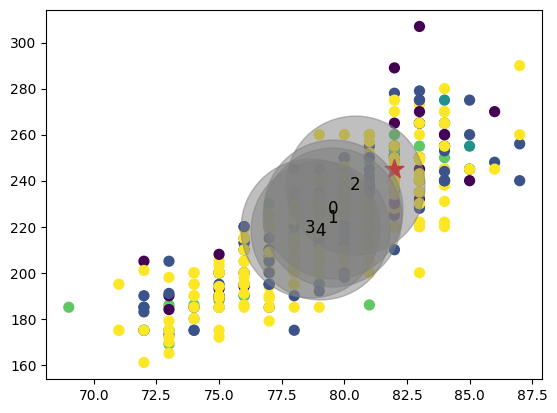

In [ ]:
XDn = ([5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4, 0])
XDn = np.array(XDn).reshape(1, -1)
ydn= mkm.predict(XDn)
print('El jugador pertenece al cluster::',mkm.predict(XDn))
print('Probabilidad de Above Avg:', AboveAvg_PerCluster.values[ydn])
print('Probabilidad de Below Avg:', BelowAvg_PerCluster.values[ydn])

XD=np.array(XD)
plt.scatter(XD[:,2],XD[:,3],c=labels,s=50,cmap='viridis')
# Replace XD1 with XDn which contains the new player data
plt.scatter(XDn[:,2],XDn[:,3],marker='*',s=200,facecolors='red') # Changed XD1 to XDn
plt.scatter(centroids[:,2],centroids[:,3],marker='*',s=200,facecolors='yellow')
plt.scatter(centroids[:,2],centroids[:,3],alpha=0.5,marker='o',s=10000,facecolors='grey')

for i, c in enumerate (centroids):
  plt.text(c[2],c[3],str(i),fontsize=12,color='black',ha='center',va='center')


#**Análisis de Resultados Kmeans**

Para la clasificación de jugadores mediante el método de clustering K-Means, se tomaron un total de 8 variables de entrada relacionadas con características físicas y de rendimiento en la NBA, incluyendo salario, edad, altura, peso, minutos por juego, asistencias, bloqueos y robos. Como variable explicativa se tomó **games_played**, que indica si el jugador jugó por encima del promedio.  

Para este modelo se estableció un total de **5 clústeres** con el objetivo de agrupar a los jugadores en categorías según sus características. Esto permite analizar la relación entre cada clúster y la variable explicativa, identificando patrones de jugadores con mayor o menor cantidad de juegos disputados en la temporada.  

Se encontró que el **clúster 4** es el que tiene el mayor porcentaje de jugadores por encima del promedio (**98.3%**), lo que indica que los jugadores de este grupo tienen una clara tendencia a disputar más partidos. De manera similar, el **clúster 2** también presenta una alta proporción de jugadores con **Above Avg (72.6%)**, lo que sugiere que este grupo comparte características favorables para una mayor participación en la liga.  

Por otro lado, el **clúster 3** es el que tiene la mayor cantidad de jugadores con **Below Avg (81.2%)**, lo que indica que los jugadores en este grupo tienen una menor participación en la temporada. El **clúster 1** se encuentra en un punto medio, con un **55.1%** de jugadores por debajo del promedio y un **44.9%** por encima, mostrando una distribución más equilibrada.  

En términos de desempeño del modelo, se obtuvo una **exactitud del 71.7%**, lo que indica que la segmentación realizada con K-Means logra una clasificación aceptable. Además, la **sensibilidad alcanzó un 48.4%**, lo que significa que el modelo identifica con menor precisión a los jugadores que juegan más partidos. La **especificidad del 89.0%** muestra que el modelo es muy preciso al identificar a los jugadores con menos juegos disputados.  

Con respecto a un nuevo jugador analizado, se encontró que pertenece al **clúster 1**, con una probabilidad del **44.9%** de estar por encima del promedio y un **55.1%** de estar por debajo del promedio. Esto indica que su desempeño se encuentra en un punto de equilibrio dentro de la clasificación realizada.

#**Conclusión: ¿Cuál modelo tuvo el mejor desempeño?**
Entre los tres modelos, Naive Bayes tuvo el desempeño más bajo, con una menor sensibilidad y una exactitud del 78.65%, lo que indica que tuvo dificultades para clasificar correctamente a los jugadores con mayor participación en juegos.

Por otro lado, tanto el Árbol de Decisión como K-Means obtuvieron una exactitud del 95.5% y 71.6%. Sin embargo, dado que el Árbol de Decisión es un modelo supervisado y diseñado específicamente para clasificación, su capacidad para predecir con precisión y de manera consistente lo hace la mejor opción para este problema.

Por lo tanto, el Árbol de Decisión fue el modelo con mejor desempeño, ya que ofrece predicciones precisas, equilibradas y con una tasa de error mínima.